## Build Following List Network

In [1]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import os
import openpyxl
from openpyxl import Workbook
from openpyxl.reader.excel import load_workbook

In [2]:
# ----- input excel -------
wb = openpyxl.load_workbook(
    '../scrape people/following_split_with_exist.xlsx')
sheet_names = wb.get_sheet_names()
ws = wb.get_sheet_by_name(sheet_names[0])

/var/folders/4p/slhgkvrd09356dhy7fljlz280000gn/T/ipykernel_57446/3971534844.py:4: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  sheet_names = wb.get_sheet_names()
/var/folders/4p/slhgkvrd09356dhy7fljlz280000gn/T/ipykernel_57446/3971534844.py:5: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  ws = wb.get_sheet_by_name(sheet_names[0])


In [14]:
G = nx.DiGraph()

In [16]:
num = 1
name_dic = {}
for i in range(2, 9466):
    name = ws.cell(row=i, column=1).value
    following = ws.cell(row=i, column=2).value

    if name == None or following == None:
        continue


    try:
        G.add_edge(name, following)


        # if i == 785 or i == 4213 or i == 8776 or i == 9398 or i == 9425:
        #     nx.draw(G)
        #     plt.savefig(f'output_{num}.jpg')
        #     num += 1
        #     print("node_num: ", G.number_of_nodes())
    except:
        print(name, following)
        break

print('nx.info:',nx.info(G))

nx.info: DiGraph with 523 nodes and 9439 edges


/var/folders/4p/slhgkvrd09356dhy7fljlz280000gn/T/ipykernel_57446/3191366386.py:24: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('nx.info:',nx.info(G))


node_num:  523


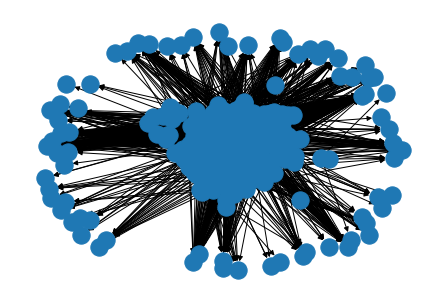

In [7]:
print("node_num: ", G.number_of_nodes())


nx.draw_spring(G)
# plt.savefig(f"output.jpg")

In [8]:
print('nx.info:',nx.info(G))  # 返回圖的基本資訊
print('nx.degree:',nx.degree(G))  # 返回圖中各頂點的度
print('nx.density:',nx.degree_histogram(G))  # 返回圖中度的分佈
print('nx.pagerank:',nx.pagerank(G))  # 返回圖中各頂點的頻率分佈


nx.info: DiGraph with 523 nodes and 9439 edges
nx.degree: [('weiche946', 65), ('tsai_ingwen', 123), ('weilovekh', 45), ('gboyswag_official', 78), ('_princess.ai', 147), ('onlychiayi', 39), ('aayan1120', 121), ('waawei', 144), ('oliviarougejaloux', 53), ('kuohsingchun_official', 82), ('leeyang0812', 81), ('tai_tzuying', 120), ('yangyungwei', 68), ('chengiching.tt', 48), ('keelung_linyuchang', 58), ('cafe_pingtung', 90), ('wusuyao541', 62), ('gogowin2020', 21), ('letsgolin', 22), ('william_chingte', 69), ('lin_chihchien', 64), ('ananpingtung', 59), ('wentsancheng', 125), ('dragonforpeople', 121), ('eballgogogo', 102), ('chenchimai', 121), ('hungyaofu', 58), ('ichin870', 41), ('wangminsheng', 21), ('ernestoykting', 6), ('wanan.chiang', 32), ('hsu07312020', 17), ('weijo_lin', 14), ('hou.yuih', 31), ('eric_chu0607', 21), ('yihua571', 31), ('yimin7665', 24), ('prof.kochihen', 18), ('leeyenhsiu', 17), ('taichungjohnny', 39), ('wang_hungwei', 4), ('skchao2024', 19), ('doctorkowj', 41), ('tpesh

/var/folders/4p/slhgkvrd09356dhy7fljlz280000gn/T/ipykernel_57446/161695999.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('nx.info:',nx.info(G))  # 返回圖的基本資訊


In [17]:
page_rank = nx.pagerank(G)

print({k: v for k, v in sorted(page_rank.items(), key=lambda item: item[1], reverse=True)})

{'jolin_cai': 0.013028087905781478, 'jaychou': 0.012631661010303167, 'him_ella0618': 0.011729330296180517, 'tsai_ingwen': 0.010730409734584499, 'tai_tzuying': 0.009821007339526958, 'blackielovelife': 0.00980183386916908, 'jam_hsiao0330': 0.009518944289716643, 'vivianhsu.ironv': 0.008652683388689155, 'rainie77': 0.008554973067711904, 'circuskidd': 0.008109395827353623, 'prince_pstar': 0.007622127844262822, 'eballgogogo': 0.007321881612878984, 'hsieh_kunda': 0.007175216878445092, 'doctorkowj': 0.006738001299534114, 'waawei': 0.006696479710418142, 'tpeshan33': 0.0064919296615906135, 'imqingfeng': 0.006483791866772805, 'chenchimai': 0.006384103134565433, 'wentsancheng': 0.006125587879199541, 'fanfan': 0.006011601535529228, 'kuohsingchun_official': 0.005982413438759443, 'william_chingte': 0.005964980653912987, 'lalabarchannel': 0.005716085930924239, 'n_a_n_a_l_e_e': 0.005562416823880585, 'aayan1120': 0.0055069782736975985, 'chiaochiaotzeng': 0.005451723370929988, 'hebe_tien_0330': 0.0053778

## Small World Phenomenon

In [120]:
# -------- Average Shortest Path Length ----------
a = nx.average_shortest_path_length(G)
print(a)

2.704805022600236


## Transitivity

In [121]:
transitivity = nx.transitivity(G)
print(transitivity)

0.24423269501323946


## Write Pickle (ig_name : chinese_name)

In [122]:
# ----- input excel -------
wbb = openpyxl.load_workbook(
    '../scrape people/IGuser.xlsx')
sheet_namess = wbb.get_sheet_names()
wss = wbb.get_sheet_by_name(sheet_namess[0])

/var/folders/4p/slhgkvrd09356dhy7fljlz280000gn/T/ipykernel_88879/1552683821.py:4: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  sheet_namess = wbb.get_sheet_names()
/var/folders/4p/slhgkvrd09356dhy7fljlz280000gn/T/ipykernel_88879/1552683821.py:5: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  wss = wbb.get_sheet_by_name(sheet_namess[0])


In [123]:
dic = {}

for i in range(100, 253):
    name = wss.cell(row=i, column=1).value
    ig_name = wss.cell(row=i, column=2).value

    if ig_name != None:
        dic[ig_name] = name
print(len(dic))

57


In [124]:
import json
f = open('./../scrape people/filtered_singer_username.json')
data_1 = json.load(f)

f = open('./../scrape people/filtered_username_politician.json')
data_2 = json.load(f)

f = open('./../scrape people/filtered_username_athlete.json')
data_3 = json.load(f)

In [125]:
import pickle


for d in data_1:
    dic[d['username']] = d['oriname']
for d in data_2:
    dic[d['username']] = d['oriname']
for d in data_3:
    dic[d['username']] = d['oriname']
with open('igname2name.pickle', 'wb') as f:
    pickle.dump(dic, f)


In [126]:
file = open('igname2name.pickle', 'rb')
data = pickle.load(file)
for i, (k, v) in enumerate(data.items()):   # 讀取字典中前十個鍵值對
    if i in range(0, 10):
        print(k, v)

eballgogogo 蘇貞昌
tsai_ingwen 蔡英文
wanan.chiang 蔣萬安
doctorkowj 柯文哲
skchao2024 趙少康
weiche946 黃偉哲
chenchimai 陳其邁
william_chingte 賴清德
hou.yuih 侯友宜
eric_chu0607 朱立倫


In [127]:
print(len(data))

693
